# Experiment results

This notebook computes some results for a given experiment. It does not aggregate over all experiments.

In [1]:
EXPERIMENT = 32

In [2]:
%cd ../..
%matplotlib inline

D:\Projects\Python\PL-Heuristic


In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from analysis.caching import get_cached_results, has_cached_results, store_results
from analysis.measures import compute_measures

In [4]:
# Computing the measures for an entire experiment can be quite slow, so we normally
# work with cached data.
if has_cached_results(EXPERIMENT):
    results = get_cached_results(EXPERIMENT)
else:
    results = compute_measures(EXPERIMENT)
    store_results(EXPERIMENT, results)

# Analysis

In [5]:
# Sanity check
assert len(results) == 100

In [6]:
df = pd.DataFrame(results, index=np.arange(1, 101))
df.describe()

,heuristic_classroom_utilisation,heuristic_instruction_size,heuristic_objective,heuristic_percentage_instruction,heuristic_percentage_self_study,heuristic_self_study_size,heuristic_teacher_utilisation,ilp_classroom_utilisation,ilp_instruction_size,ilp_objective,ilp_percentage_instruction,ilp_percentage_self_study,ilp_self_study_size,ilp_teacher_utilisation
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,99.337209,12.667666,8964.696401,47.810000,52.190000,36.078554,53.393750,100.0,12.794201,9127.229917,60.000000,40.000000,58.606042,53.75
std,1.561404,0.629009,116.271477,5.396970,5.396970,8.812018,0.839255,0.0,0.333390,106.019777,2.636189,2.636189,3.614115,0.00
min,93.023256,11.492754,8709.586647,38.125000,40.312500,25.848485,50.000000,100.0,12.273973,8908.950087,56.000000,34.000000,54.153846,53.75
25%,100.000000,12.321491,8882.516605,43.859375,48.781250,28.310606,53.750000,100.0,12.540541,9054.955461,58.000000,38.000000,56.000000,53.75
50%,100.000000,12.622642,8957.906990,47.531250,52.468750,33.379808,53.750000,100.0,12.800000,9111.650953,60.000000,40.000000,58.181818,53.75
75%,100.000000,13.025563,9035.665854,51.218750,56.140625,43.485294,53.750000,100.0,13.052632,9197.492235,62.000000,42.000000,60.800000,53.75
max,100.000000,14.370370,9214.993561,59.687500,61.875000,54.750000,53.750000,100.0,13.538462,9409.286254,66.000000,44.000000,68.000000,53.75


## Objective

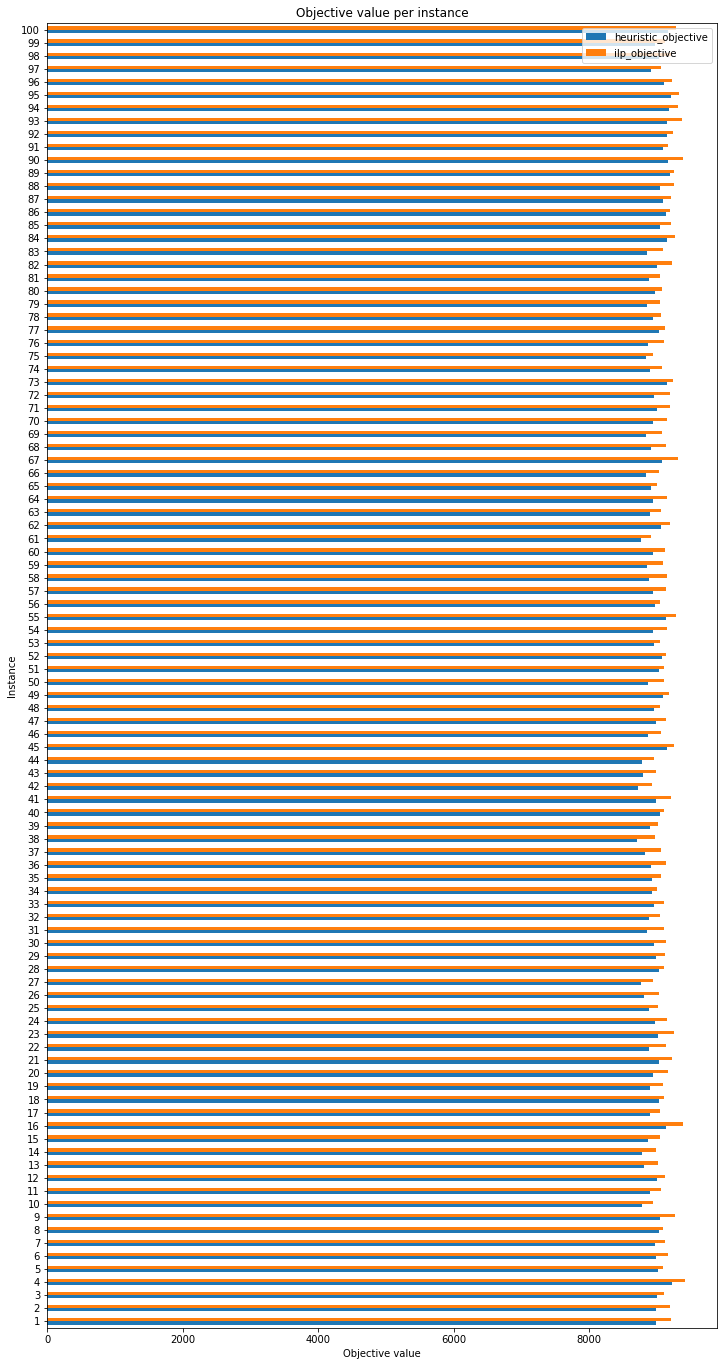

In [7]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Objective value per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Objective value")

df[["heuristic_objective", "ilp_objective"]].plot.barh(ax=ax)

In [8]:
heuristic_objective = df['heuristic_objective'].mean()
ilp_objective = df['ilp_objective'].mean()

difference = 100 * (heuristic_objective - ilp_objective) / ilp_objective

print(f"Percentage difference between heuristic and optimal solution is {difference:.2f}%.")
print(f"The averages are {ilp_objective:.2f} (ilp), against {heuristic_objective:.2f} (heuristic).")

Percentage difference between heuristic and optimal solution is -1.78%.
The averages are 9127.23 (ilp), against 8964.70 (heuristic).


## Percentages instruction and self-study

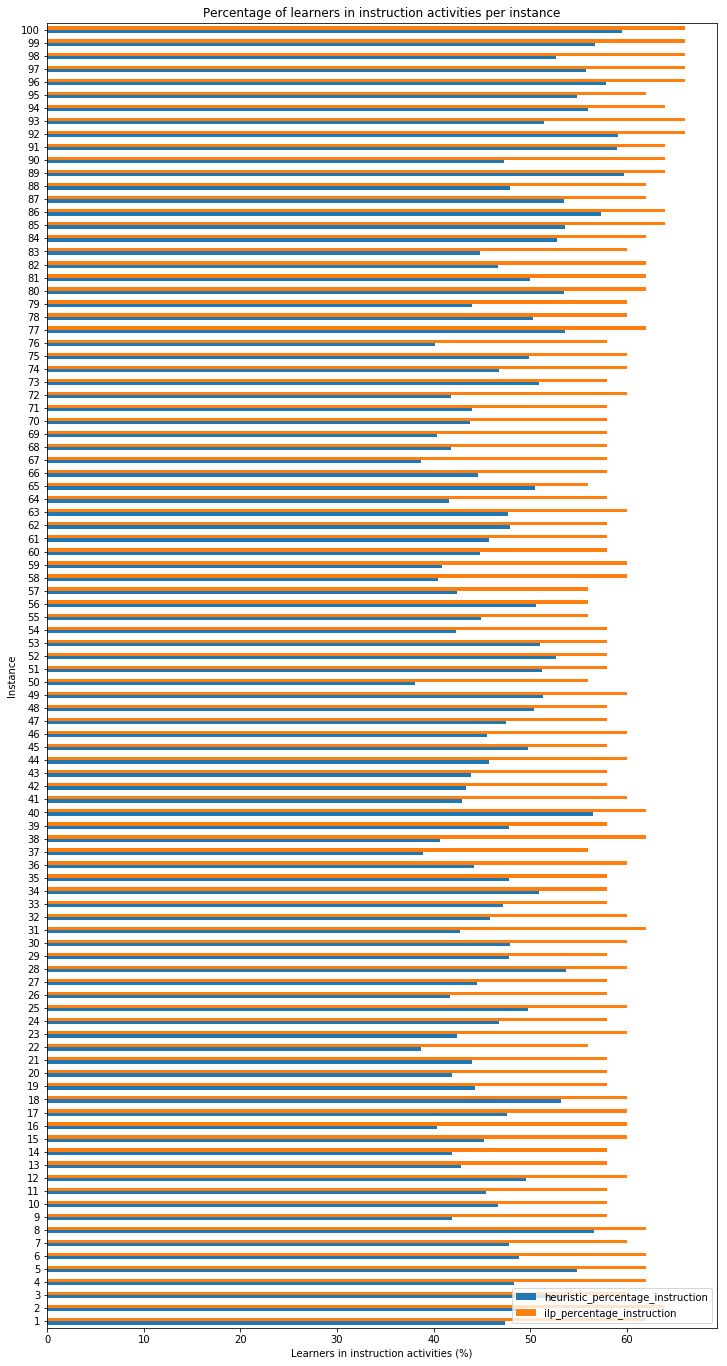

In [9]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in instruction activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in instruction activities (%)")

df[["heuristic_percentage_instruction", "ilp_percentage_instruction"]].plot.barh(ax=ax)

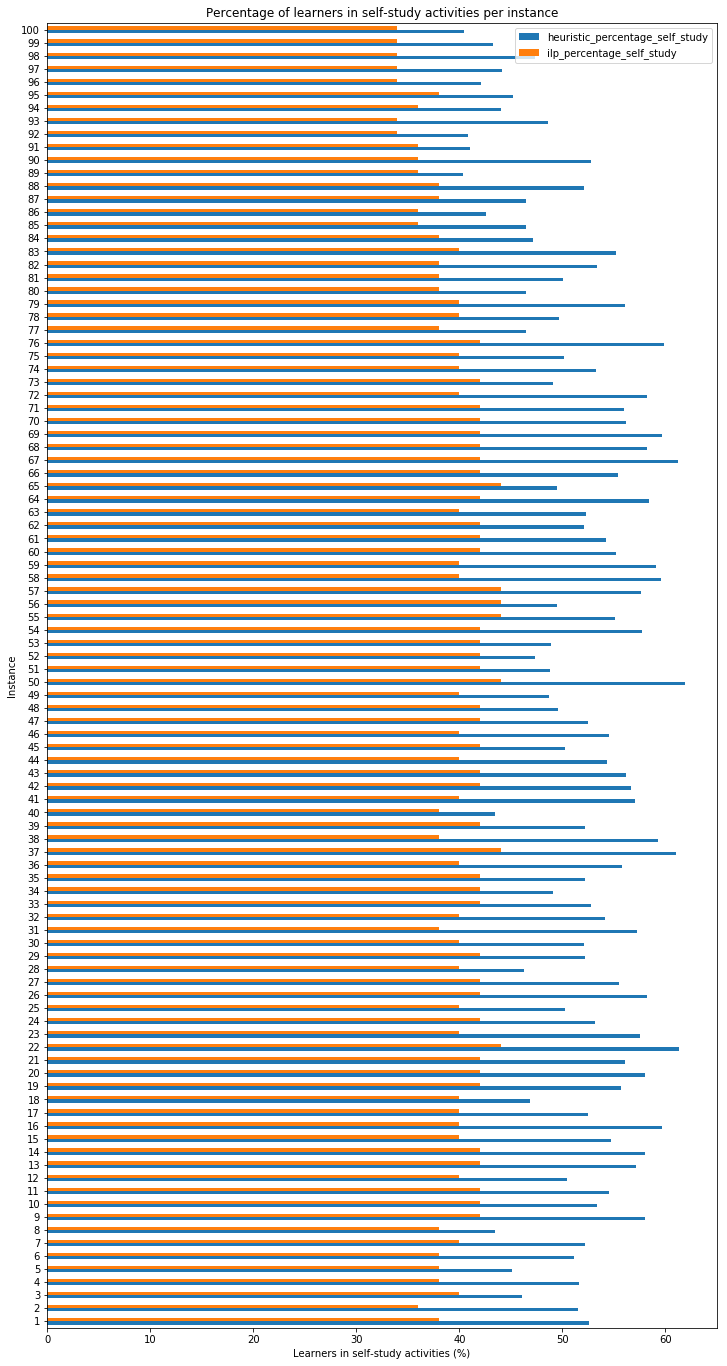

In [10]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in self-study activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in self-study activities (%)")

df[["heuristic_percentage_self_study", "ilp_percentage_self_study"]].plot.barh(ax=ax)

In [11]:
heuristic_percentage_self_study = df['heuristic_percentage_self_study'].mean()
ilp_percentage_self_study = df['ilp_percentage_self_study'].mean()

difference = 100 * (heuristic_percentage_self_study - ilp_percentage_self_study) / ilp_percentage_self_study

print(f"On average, the heuristic solution has {difference:.2f}% more learners in self-study activities.")
print(f"The averages are {ilp_percentage_self_study:.2f}% (ilp), against {heuristic_percentage_self_study:.2f}% (heuristic).")

On average, the heuristic solution has 30.47% more learners in self-study activities.
The averages are 40.00% (ilp), against 52.19% (heuristic).


## Activity sizes

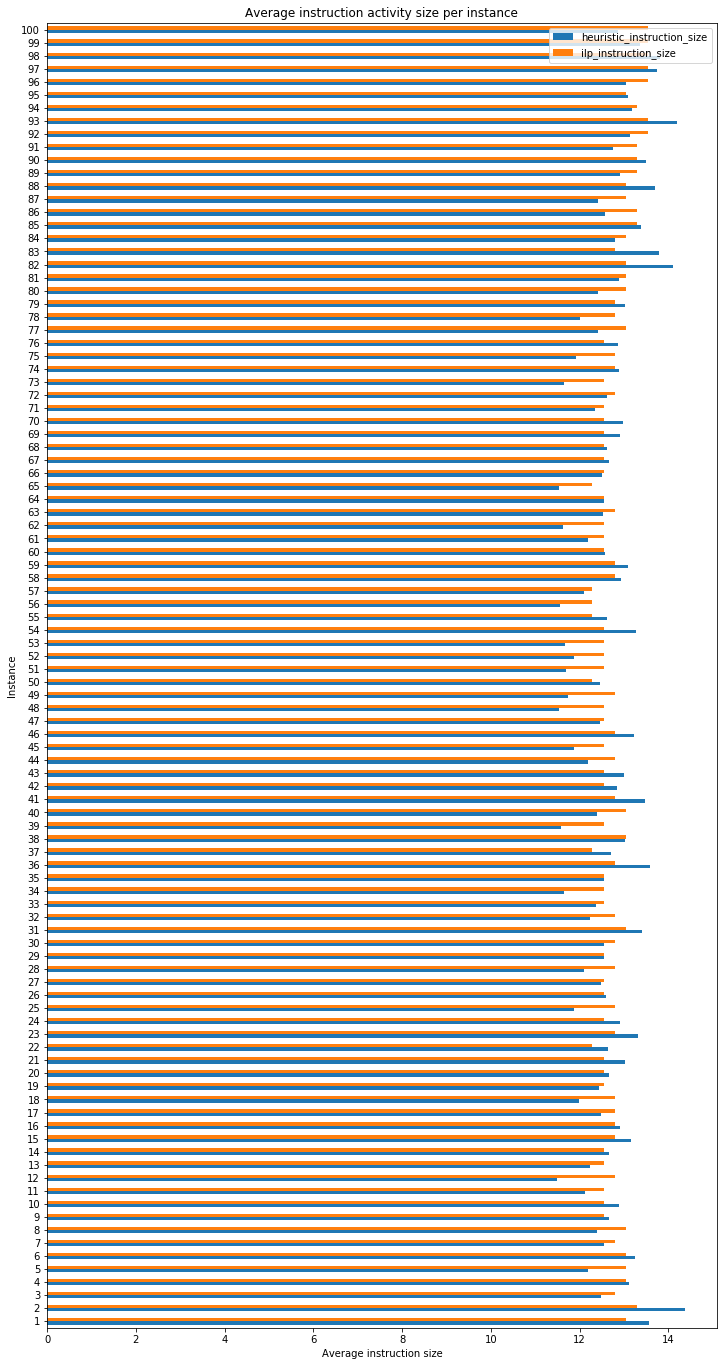

In [12]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average instruction activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average instruction size")

df[["heuristic_instruction_size", "ilp_instruction_size"]].plot.barh(ax=ax)

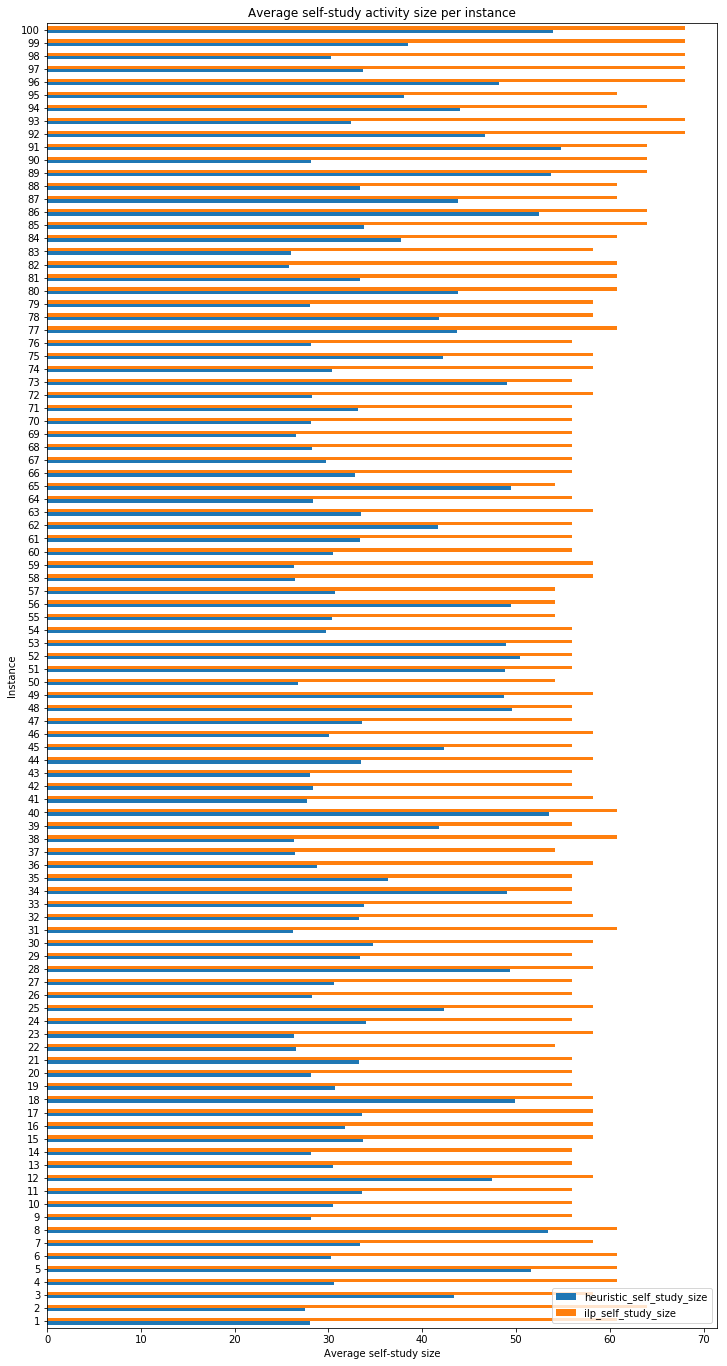

In [13]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average self-study activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average self-study size")

df[["heuristic_self_study_size", "ilp_self_study_size"]].plot.barh(ax=ax)

# Classroom and teacher pool utilisation

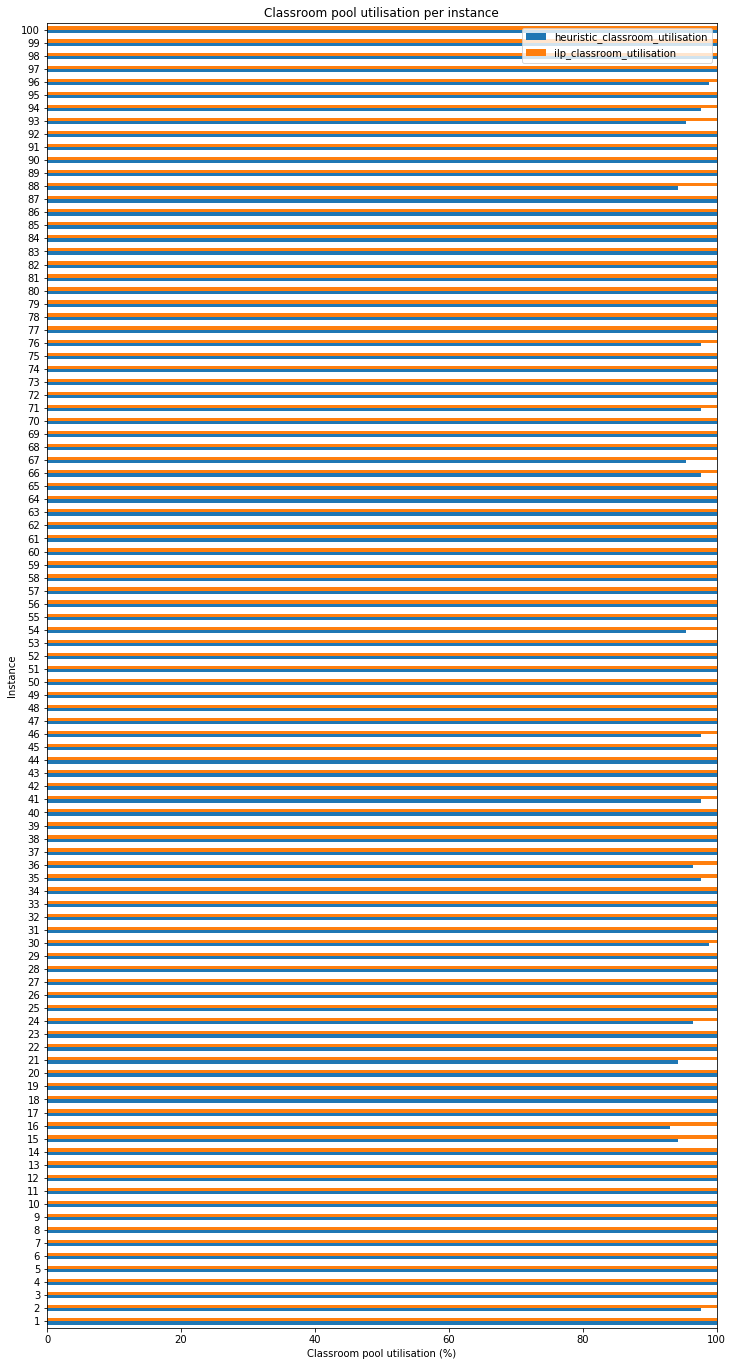

In [14]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Classroom pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Classroom pool utilisation (%)")

df[["heuristic_classroom_utilisation", "ilp_classroom_utilisation"]].plot.barh(ax=ax)

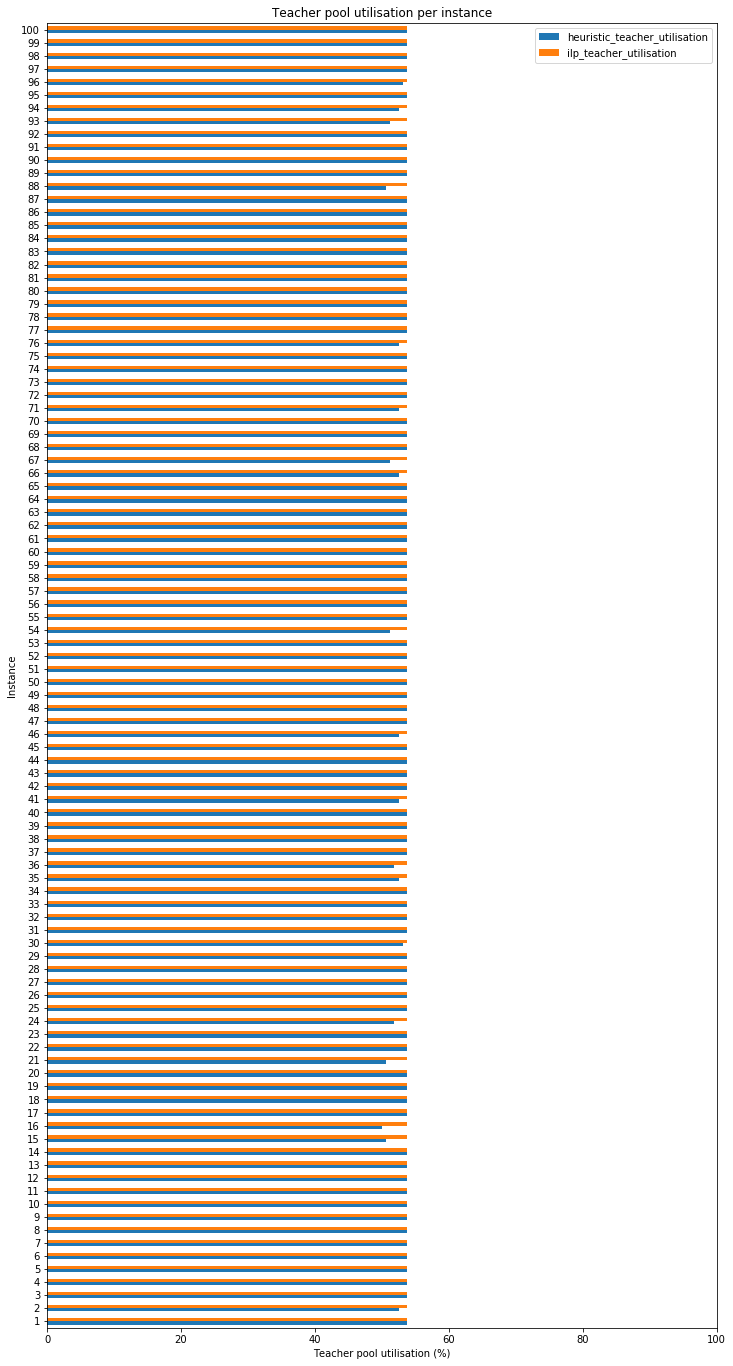

In [15]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Teacher pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Teacher pool utilisation (%)")

df[["heuristic_teacher_utilisation", "ilp_teacher_utilisation"]].plot.barh(ax=ax)